# Import

In [1]:
import numpy as np
import PIL
from PIL import Image
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping

2022-03-02 12:21:32.465967: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-02 12:21:32.466029: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Dataset creation

In [2]:
#/home/christophelanson/code/christophelanson/icangetyoursmile/raw_data/sns/64x64/no_smile

In [3]:
absolute_path = os.path.dirname(os.path.dirname(os.getcwd()))
path = absolute_path + "/raw_data/sns/"
path

'/home/romain/code/christophelanson/icangetyoursmile/raw_data/sns/'

## Dataset function generation

In [4]:
def create_dataset(path_to_images, image_size=(64,64), batch_size=32, validation_split=0.2, random_seed=1):
    path_to_images += f'{image_size[0]}x{image_size[1]}'
      
    #Create train and validation for X,y
    
    train_dataset = image_dataset_from_directory(
        directory=path_to_images,
        labels="inferred",
        batch_size=batch_size,
        validation_split=validation_split,
        image_size=image_size,
        subset="training",
        seed=random_seed)
    
    validation_dataset = image_dataset_from_directory(
        directory=path_to_images,
        labels="inferred",
        batch_size=batch_size,
        validation_split=validation_split,
        image_size=image_size,
        subset="validation",
        seed=random_seed)
    
    
    return train_dataset, validation_dataset

### Generate Dataset

In [5]:
train_dataset, validation_dataset = create_dataset(path)

Found 10000 files belonging to 2 classes.
Using 8000 files for training.


2022-03-02 12:21:34.228589: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (100)
2022-03-02 12:21:34.228640: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-MPVTJ3SV): /proc/driver/nvidia/version does not exist
2022-03-02 12:21:34.228933: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 10000 files belonging to 2 classes.
Using 2000 files for validation.


In [6]:
for image_batch, labels_batch in train_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 64, 3)
(32,)
(32, 64, 6

## Plot results from DS

In [7]:
class_names = train_dataset.class_names
class_names

['no_smile', 'smile']

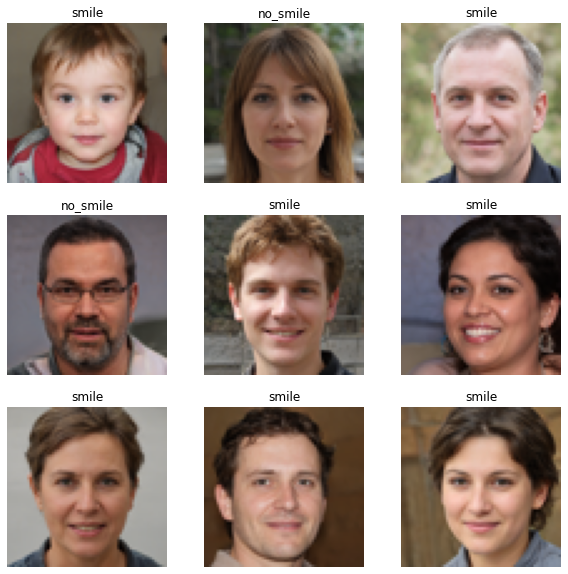

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Base Model

## Create Model

In [9]:
def initialize_model():    
    
    model = Sequential([
        layers.Conv2D(8, 3, padding='same', activation='relu', input_shape=(64,64,3)),
        layers.MaxPooling2D(),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        #layers.Conv2D(64, 3, padding='same', activation='relu'),
        #layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation="sigmoid"),
    ])
    
    model.compile(optimizer="adam",
                 loss="binary_crossentropy",
                 metrics=["accuracy"])
    
    return model

## Initialize Model

In [10]:
model = initialize_model()

## Model Summary

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0

## Model fit

In [12]:
epochs = 10
es = EarlyStopping(patience=5, restore_best_weights=True)

In [13]:
%%time
history = model.fit(train_dataset,
                   validation_data=validation_dataset,
                   epochs=epochs,
                   batch_size=16,
                   callbacks=[es])

Epoch 1/10
250/250 [==============================] - 5s 20ms/step - loss: 0.8905 - accuracy: 0.6886 - val_loss: 0.4649 - val_accuracy: 0.7745
Epoch 2/10
250/250 [==============================] - 5s 19ms/step - loss: 0.3612 - accuracy: 0.8305 - val_loss: 0.3126 - val_accuracy: 0.8670
Epoch 3/10
250/250 [==============================] - 5s 19ms/step - loss: 0.2897 - accuracy: 0.8721 - val_loss: 0.2922 - val_accuracy: 0.8710
Epoch 4/10
250/250 [==============================] - 5s 19ms/step - loss: 0.2613 - accuracy: 0.8839 - val_loss: 0.2837 - val_accuracy: 0.8780
Epoch 5/10
250/250 [==============================] - 5s 19ms/step - loss: 0.2526 - accuracy: 0.8901 - val_loss: 0.2753 - val_accuracy: 0.8880
Epoch 6/10
250/250 [==============================] - 5s 20ms/step - loss: 0.2426 - accuracy: 0.8942 - val_loss: 0.2752 - val_accuracy: 0.8865
Epoch 7/10
250/250 [==============================] - 5s 18ms/step - loss: 0.2338 - accuracy: 0.9001 - val_loss: 0.2837 - val_accuracy: 0.8795

## Plot Accuracy & Loss

In [14]:
acc = history.history['accuracy']
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history['val_loss']
epochs_range = range(epochs)

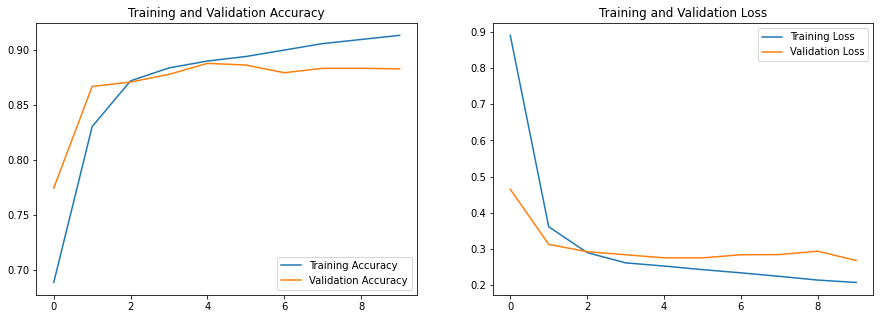

In [15]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Leaky ReLU

## Create ReLU Model

In [16]:
def initialize_ReLU_model():    
    
    model = Sequential([
        layers.Conv2D(8, 3, padding='same', activation='LeakyReLU', input_shape=(64,64,3)),
        layers.MaxPooling2D(),
        layers.Conv2D(16, 3, padding='same', activation='LeakyReLU'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='LeakyReLU'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='LeakyReLU'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation="sigmoid"),
    ])
    
    model.compile(optimizer="adam",
                 loss="binary_crossentropy",
                 metrics=["accuracy"])
    
    return model

## Initialize ReLU Model

In [33]:
ReLU_model = initialize_ReLU_model()

## ReLU Model Summary

In [34]:
ReLU_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 64, 64, 8)         224       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        1168      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 32)        

## ReLU Model Fit

In [35]:
epochs_r = 100
es = EarlyStopping(patience=5, restore_best_weights=True)

In [36]:
%%time
history_ReLU = model.fit(train_dataset,
                   validation_data=validation_dataset,
                   epochs=epochs_r,
                   batch_size=16,
                   #callbacks=[es]
    )

Epoch 1/100
250/250 [==============================] - 5s 19ms/step - loss: 0.1287 - accuracy: 0.9491 - val_loss: 0.3741 - val_accuracy: 0.8805
Epoch 2/100
250/250 [==============================] - 5s 19ms/step - loss: 0.1302 - accuracy: 0.9484 - val_loss: 0.4422 - val_accuracy: 0.8550
Epoch 3/100
250/250 [==============================] - 5s 20ms/step - loss: 0.1190 - accuracy: 0.9504 - val_loss: 0.4392 - val_accuracy: 0.8715
Epoch 4/100
250/250 [==============================] - 5s 19ms/step - loss: 0.0985 - accuracy: 0.9599 - val_loss: 0.4747 - val_accuracy: 0.8775
Epoch 5/100
250/250 [==============================] - 5s 20ms/step - loss: 0.1019 - accuracy: 0.9597 - val_loss: 0.5011 - val_accuracy: 0.8655
Epoch 6/100
250/250 [==============================] - 5s 20ms/step - loss: 0.0933 - accuracy: 0.9610 - val_loss: 0.4682 - val_accuracy: 0.8715
Epoch 7/100
250/250 [==============================] - 5s 19ms/step - loss: 0.0836 - accuracy: 0.9674 - val_loss: 0.5425 - val_accuracy:

## Plot ReLU Accuracy & Loss

In [37]:
acc_r = history_ReLU.history['accuracy']
val_acc_r = history_ReLU.history["val_accuracy"]
loss_r = history_ReLU.history["loss"]
val_loss_r = history_ReLU.history['val_loss']
epochs_range_r = range(epochs_r)

In [38]:
history_ReLU.history

{'loss': [0.12870746850967407,
  0.13022948801517487,
  0.11901866644620895,
  0.09853111952543259,
  0.10186291486024857,
  0.09326574951410294,
  0.08362088352441788,
  0.08257560431957245,
  0.07283179461956024,
  0.06356053054332733,
  0.07332984358072281,
  0.0684388130903244,
  0.044314172118902206,
  0.037948429584503174,
  0.040637627243995667,
  0.0580245777964592,
  0.03759743645787239,
  0.08082826435565948,
  0.05552126467227936,
  0.034054022282361984,
  0.031861983239650726,
  0.04314228147268295,
  0.03463513404130936,
  0.04164379835128784,
  0.03729795664548874,
  0.04315518960356712,
  0.02861764095723629,
  0.03133753687143326,
  0.02737903967499733,
  0.04477139934897423,
  0.03180510550737381,
  0.023614346981048584,
  0.020605195313692093,
  0.028238268569111824,
  0.012388122268021107,
  0.03436512500047684,
  0.04991019144654274,
  0.041373565793037415,
  0.02199363522231579,
  0.01474240142852068,
  0.022998426109552383,
  0.02423093654215336,
  0.0326922833919

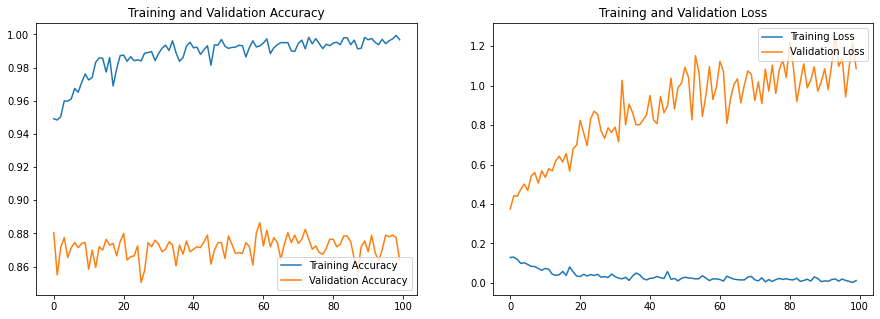

In [39]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_r, acc_r, label='Training Accuracy')
plt.plot(epochs_range_r, val_acc_r, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range_r, loss_r, label='Training Loss')
plt.plot(epochs_range_r, val_loss_r, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()